# STAT3612 Lecture 10 - Neural Networks

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3612 Data Mining](http://www.statsoft.org/teaching/stat3612/)

4-11 April 2019

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd 
from matplotlib import pylab as plt
import matplotlib.colors as col
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
np.set_printoptions(suppress=True, precision = 3)

def plot_decision_boundary(x, y, model, title):
    h = 0.02
    x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max() +0.1
    y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max() +0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    cmap_light = col.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = col.ListedColormap(['#FF0000', '#00FF00'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=cmap_light,
               aspect='auto', origin='lower')
    plt.scatter(x[:, 0:1], x[:, 1:2], c=y, edgecolors='k', cmap=cmap_bold)
    plt.title(title, fontsize=15, fontweight="bold")

# Scikit-Learn - MLPClassifier 

```python
MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
```

- hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)

- activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x))

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x)

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

- solver : {'lbfgs', 'sgd', 'adam'}, default 'adam'

    - 'sgd' refers to stochastic gradient descent

    - 'adam' refers to a stochastic gradient-based optimizer proposed
      by Kingma, Diederik, and Jimmy Ba

- batch_size : int, optional, default 'auto' `batch_size=min(200, n_samples)`

- learning_rate_init : double, optional, default 0.001
    The initial learning rate used. It controls the step-size
    in updating the weights. Only used when solver='sgd' or 'adam'

- max_iter : int, optional, default 200

- alpha (L2 penalty parameter): float, optional, default 0.0001 

- verbose : bool, optional, default False

## Example 1: Mixture Data

In [10]:
DataX = pd.read_csv("mixture.csv", index_col = [0])
cmap_light = col.ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = col.ListedColormap(['#FF0000', '#00FF00'])
x = DataX.iloc[:,:2].values 
y = DataX.iloc[:,2:].values

Prediction Accuracy: 0.74


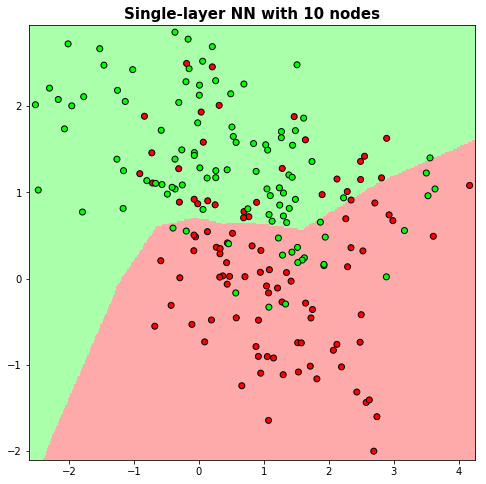

In [11]:
clf = MLPClassifier(hidden_layer_sizes = [10], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 200, random_state=2019)
clf.fit(x, y)
print("Prediction Accuracy:", accuracy_score(y, clf.predict(x)))
plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x, y.reshape([-1,1]), clf, title = "Single-layer NN with 10 nodes")

Prediction Accuracy: 0.84


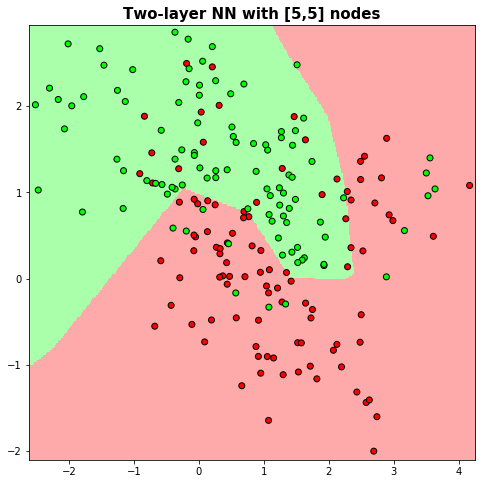

In [12]:
clf = MLPClassifier(hidden_layer_sizes = [5,5], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 200, random_state=2019)
clf.fit(x, y)
print("Prediction Accuracy:", accuracy_score(y, clf.predict(x)))
plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x, y.reshape([-1,1]), clf, title = "Two-layer NN with [5,5] nodes")

## Example 2: Moon Data

In [13]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x, y = make_moons(n_samples=10000, noise=0.2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

Testing Accuracy: 0.871


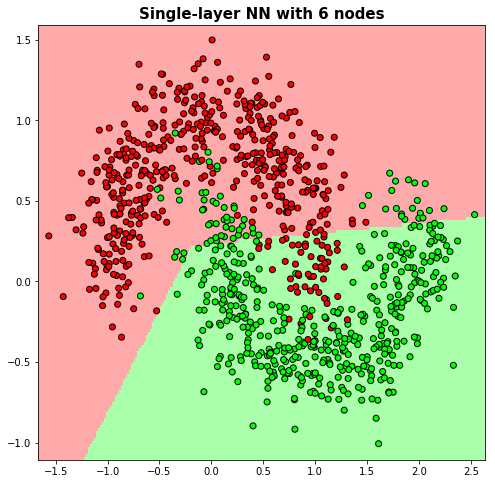

In [14]:
clf = MLPClassifier(hidden_layer_sizes = [6], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 200, verbose = False, random_state=2019)
clf.fit(x_train, y_train)
print("Testing Accuracy:", accuracy_score(y_test, clf.predict(x_test)))
plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_test, y_test.reshape([-1,1]), clf, title = "Single-layer NN with 6 nodes")

Testing Accuracy: 0.968


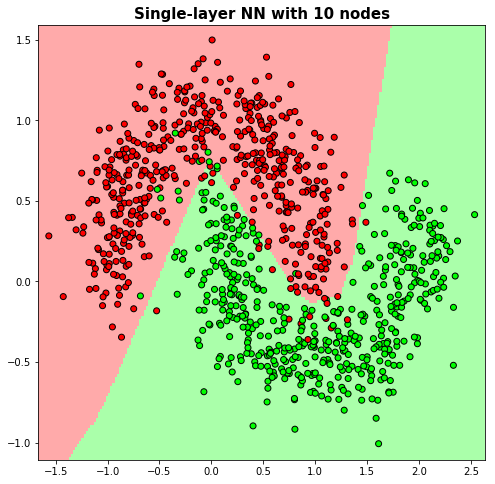

In [15]:
clf = MLPClassifier(hidden_layer_sizes = [10], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 200, verbose = False, random_state=2019)
clf.fit(x_train, y_train)
print("Testing Accuracy:", accuracy_score(y_test, clf.predict(x_test)))
plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_test, y_test.reshape([-1,1]), clf, title = "Single-layer NN with 10 nodes")

Testing Accuracy: 0.962


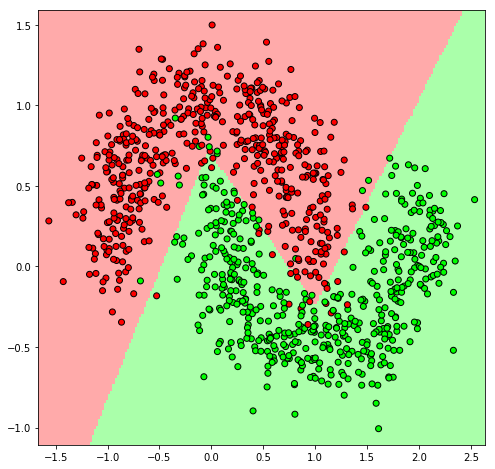

In [16]:
clf = MLPClassifier(hidden_layer_sizes = [3, 3], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 200, verbose = False, random_state=2019)
clf.fit(x_train, y_train)
print("Testing Accuracy:", accuracy_score(y_test, clf.predict(x_test)))
plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_test, y_test.reshape([-1,1]), clf, title = "")

## TensorFlow/Keras 

To be continued  .. .